In [ ]:
from torchvision import models

In [ ]:
models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [ ]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor,RandomResizedCrop,Normalize,Compose

train_transforms=Compose([
    RandomResizedCrop(224),
    ToTensor(),
    Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
test_transforms=Compose([
    RandomResizedCrop(224),
    ToTensor(),
    Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
train_set=CIFAR10(root="./data",train=True,transform=train_transforms,download=True)
test_set=CIFAR10(root="./data",train=False,transform=train_transforms,download=True)

100%|██████████| 170498071/170498071 [00:12<00:00, 13187710.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
vgg_net=models.vgg16_bn()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:06<00:00, 82.1MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
vgg_gpu=vgg_net.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(vgg_gpu.parameters(),lr=0.01)


In [ ]:
loss_epoch_arr=[]
max_epochs=1

train_loader=DataLoader(train_set,batch_size=32,shuffle=True)
test_loader=DataLoader(test_set,batch_size=32,shuffle=False)

for epoch in range(max_epochs):
  for i,data in enumerate(train_loader,0):
    features,labels=data[0].to(device),data[1].to(device)
    optimizer.zero_grad()
    predicted=vgg_gpu(features)
    loss=criterion(predicted,labels)
    loss.backward()
    optimizer.step()
    del features,labels

    if i % 100 == 0:
      loss_epoch_arr.append(loss.item())
      print(f"loss:{loss.item()}")

loss:6.637482166290283
loss:5.902631759643555
loss:2.358614444732666
loss:2.3660292625427246
loss:2.2677419185638428
loss:2.3826379776000977
loss:2.3325982093811035
loss:2.300356388092041
loss:2.3168423175811768
loss:2.302708148956299
loss:2.2983949184417725
loss:2.307138204574585
loss:2.31060791015625
loss:2.3207614421844482
loss:2.258958578109741
loss:2.282090663909912


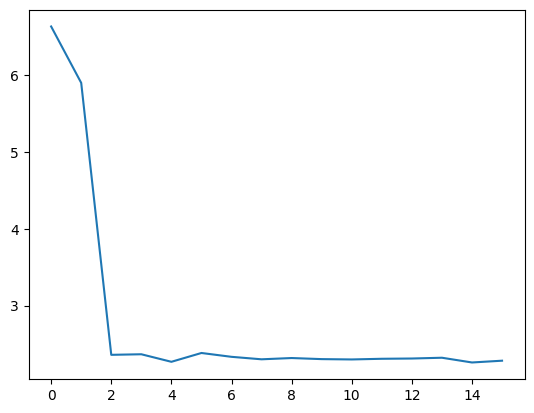

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
def evaluation(data_loader,model):
  running_total=0
  running_correct_preds=0
  for features,labels in data_loader:
    features,labels=features.to(device),labels.to(device)
    outputs=model(features)
    _,predictions=torch.max(outputs.data,1)
    running_total+=labels.size(0)
    running_correct_preds+=(predictions==labels).sum().item()
  return 100*running_correct_preds/running_total

In [ ]:
evaluation(test_loader,vgg_gpu)

10.11

In [ ]:
torch.cuda.empty_cache()